There are several criteria and variables that determine whether an employee is a candidate for promotion, including age, length of service, gender, and qualifying training periods. This data has been collected for people who have been promoted, and what is required is to design a predictive model about whether an employee is likely to be nominated for a promotion. In light of this, we will explore the data and build a model that will help the administration reduce its burden in searching for the appropriate candidate

# <h1 style='background:#EED4E5; border:0; color:black'><center>Promotion prediction</center></h1> 


   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 style='background:#EED4E5; border:0; color:black'><center>TABLE OF CONTENTS</center></h1>

In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
sns.set(rc = {'figure.figsize' : [5,5]} , font_scale = 1.3)
import warnings 
warnings.filterwarnings('ignore')

In [356]:
df = pd.read_csv("train.csv")

## Explore data

In [357]:
df.head() 

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [358]:
df.duplicated().sum()

0

In [359]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [360]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


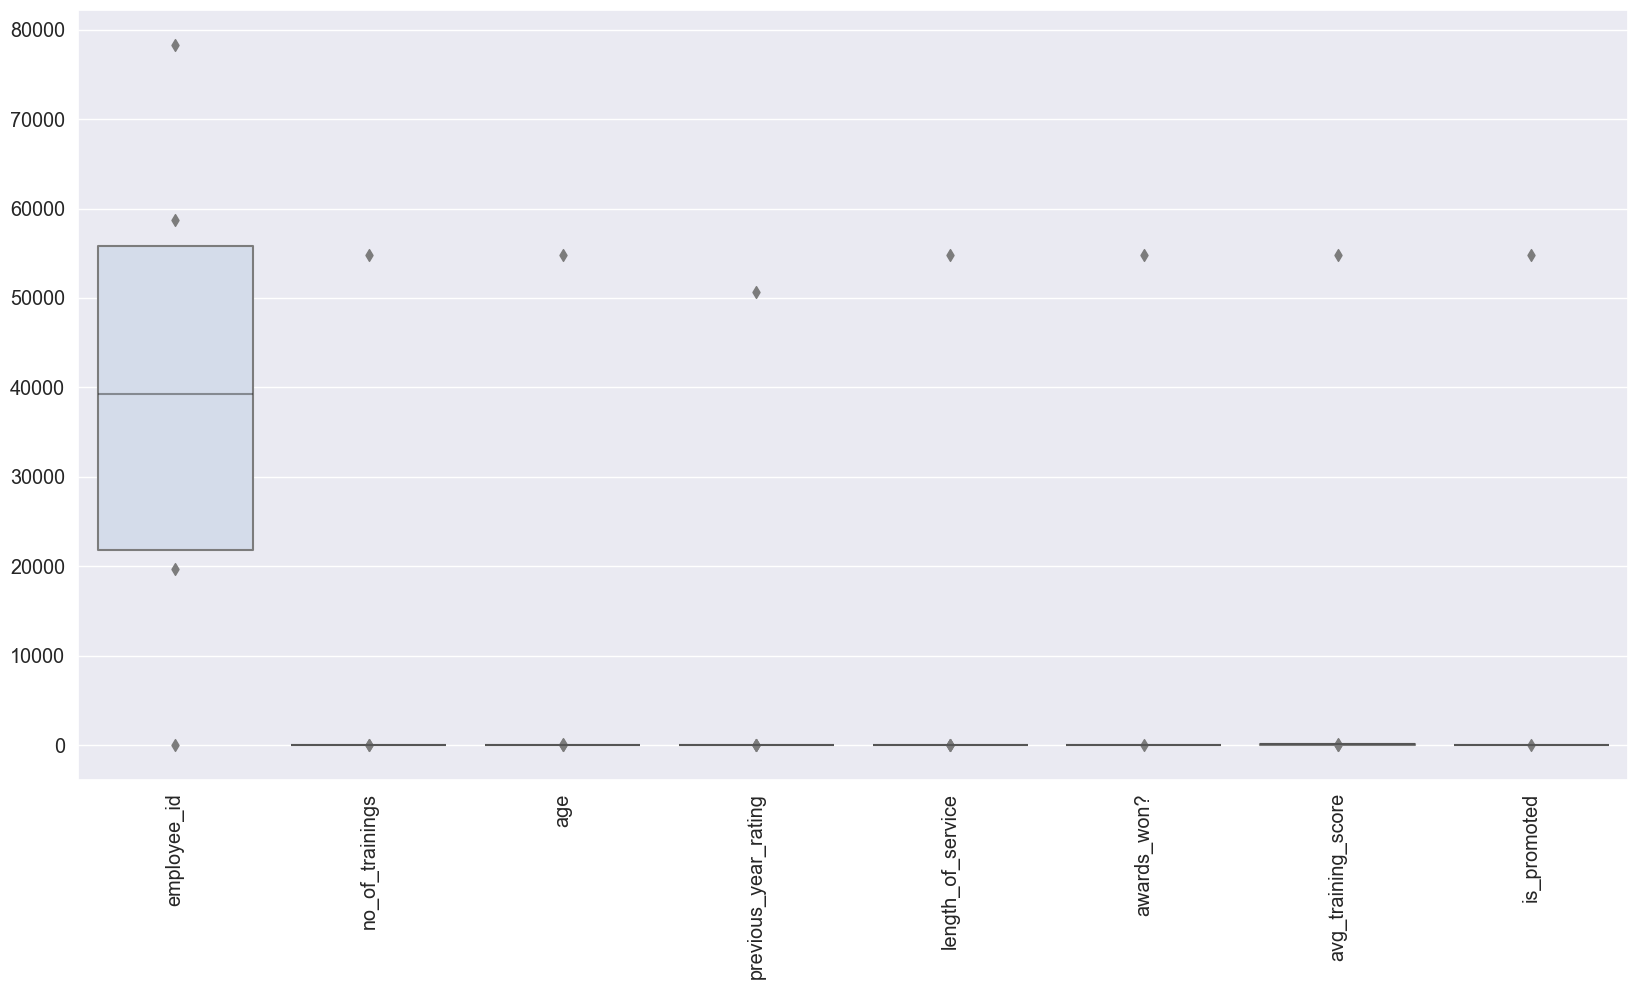

In [361]:
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(df.describe() ,palette = colours)
plt.xticks(rotation=90)
plt.show()

## Data preprocessing
Handle the missing values 
There are some strategies to handle missing values 
The mode will be good choice for the categorical values and the median for the numerical

In [362]:
def ask (x):
    if x == 'f' :
        return 0
    else :
        return 1

In [363]:
df['gender']=df['gender'].apply(ask)

In [364]:
df['education'].fillna(df['education'].mode()[0],axis = 0, inplace =True)

In [365]:
df['previous_year_rating'].fillna(df['previous_year_rating'].median(),axis = 0, inplace =True)

In [366]:
edu = {"Bachelor's":2,"Master's & above":1,"Below Secondary":3}

In [367]:
df['education']= df['education'].map(edu)

In [368]:
df.drop('employee_id',axis = 1 , inplace = True)

In [369]:
df.isna().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

## 
Is_promoted column represents the candidates which 1 refer to yes and 0 to no 
The department has the most candidates

<Axes: xlabel='is_promoted', ylabel='count'>

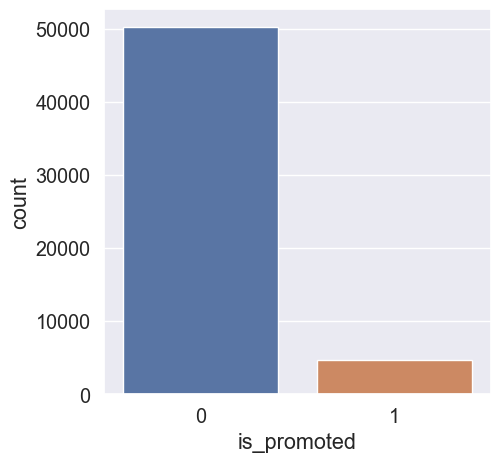

In [370]:

sns.countplot(df  , x= 'is_promoted')

In [371]:
df[df['is_promoted']== 1]['department'].value_counts()

department
Sales & Marketing    1213
Operations           1023
Technology            768
Procurement           688
Analytics             512
Finance               206
HR                    136
R&D                    69
Legal                  53
Name: count, dtype: int64

In [372]:
df[df['is_promoted']== 1]['avg_training_score'].mean()

71.32519280205655

In [373]:
df[df['is_promoted']== 0]['avg_training_score'].mean()

62.64768647786199

In [374]:
Find_is_promoted.index

Index([0, 1], dtype='int64', name='is_promoted')

In [375]:
Find_is_promoted.index

Index([0, 1], dtype='int64', name='is_promoted')

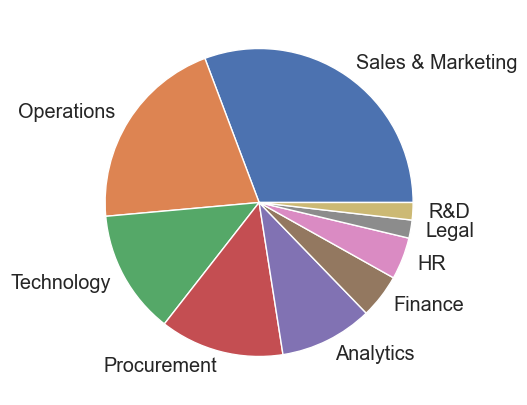

In [376]:
# The department has the most candidates
plt.pie(df['department'].value_counts() ,labels =  df['department'].value_counts().index)
plt.show()

Most of those candidates came from the sales & marketing  

In [377]:
departmeant = df[['department', 'length_of_service','previous_year_rating','avg_training_score']].groupby('department').mean()

<Axes: xlabel='previous_year_rating', ylabel='department'>

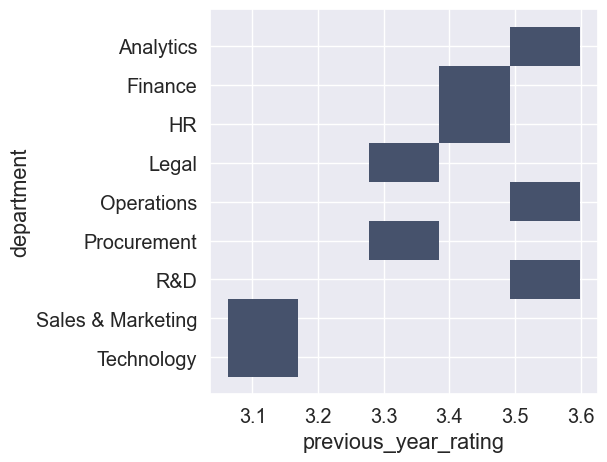

In [378]:
sns.histplot(departmeant ,y  = 'department',x = 'previous_year_rating' )

Most of those with many years of experience came from other channels


In [381]:
region = df[['region', 'length_of_service','previous_year_rating','avg_training_score']].groupby('region').mean()
region.head(10)

,length_of_service,previous_year_rating,avg_training_score
region,,,
region_1,4.783607,3.393443,60.318033
region_10,5.680556,3.248457,63.243827
region_11,5.276046,3.327757,63.227376
region_12,4.176000,3.270000,61.396000
region_13,6.192221,3.328550,62.513595
region_14,5.932285,3.310762,61.551391
region_15,6.231125,3.330484,62.085826
region_16,5.690102,3.223891,61.873720
region_17,6.265075,3.430905,65.894472


<Axes: xlabel='length_of_service', ylabel='avg_training_score'>

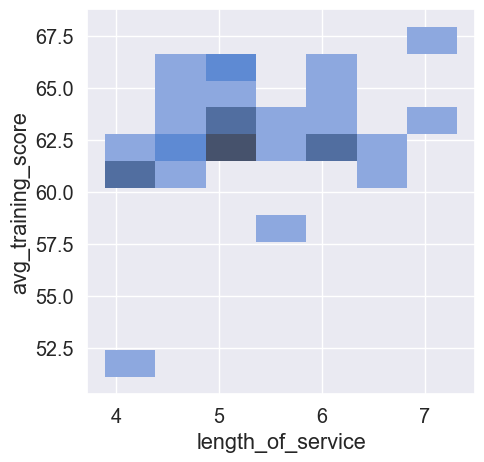

In [382]:
sns.histplot(region , y = 'avg_training_score' , x=  'length_of_service')

In [383]:
Find_is_promoted = df[['is_promoted','awards_won?','avg_training_score','no_of_trainings','previous_year_rating']].groupby('is_promoted').mean()
Find_is_promoted

,awards_won?,avg_training_score,no_of_trainings,previous_year_rating
is_promoted,,,,
0,0.014180,62.647686,1.257639,3.247686
1,0.119751,71.325193,1.203299,3.914524


A we see the most the features that has big impact to determine the appropriate candidate for the promotion are

[ awards_won,avg_training_score,no_of_trainings	,previous_year_rating ]

In [384]:
df.drop('region',axis = 1 , inplace = True)

<a id="5"></a>
 <h2 style='background:#C2C4E2; border:0; color:black'><center>MODEL BUILDING</center></h2> 
 
# MODEL BUILDING


**In this project, we build an artificial neural network.**

**Following steps are involved in the model building**

* Assining X and y the status of attributes and tags
* Splitting test and training sets
* Initialising the neural network
* Defining by adding layers
* Compiling the neural network
* Train the neural network

In [385]:
from keras.layers import Dense , Dropout 
from keras.models import Model , Sequential 
from keras.callbacks import EarlyStopping , TensorBoard
from sklearn.model_selection import cross_validate , train_test_split
from sklearn.preprocessing import StandardScaler
from keras import callbacks

Encoding the categorical records

['region','department','recruitment_channel']

In [388]:
data = pd.get_dummies(df,columns=['department','recruitment_channel'], dtype=float , drop_first= True )

In [390]:
x = data.drop('is_promoted',axis = 1)
y = data['is_promoted']

In [391]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=108)

In [392]:
x_train.shape

(43846, 18)

In [393]:
scal = StandardScaler()
x_train[['age','avg_training_score']] = scal.fit_transform(x_train[['age','avg_training_score']])
x_test[['age','avg_training_score']] = scal.fit_transform(x_test[['age','avg_training_score']] )

In [394]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [399]:
model = Sequential()
model.add(Dense(256,activation='sigmoid',input_dim=18))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='Adam' , metrics=['accuracy'])

In [400]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 256)                 │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,081 (180.00 KB)

 Trainable params: 46,081 (180.00 KB)

 Non-trainable params: 0 (0.00 B)

In [401]:
hist = model.fit(x_train, y_train,epochs=20 )

Epoch 1/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9175 - loss: 0.2752
Epoch 2/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9238 - loss: 0.2453
Epoch 3/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9288 - loss: 0.2369
Epoch 4/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9354 - loss: 0.2214
Epoch 5/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9405 - loss: 0.2081
Epoch 6/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9388 - loss: 0.2109
Epoch 7/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9394 - loss: 0.2100
Epoch 8/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9404 - loss: 0.2076
Epoch 9/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9404 - loss: 0.2101
Epoch 10/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9434 - loss: 0.1998
Epoch 11/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9416 - loss: 0.2033
Epoch 12/20
1371/1371 ━━━━━━━━

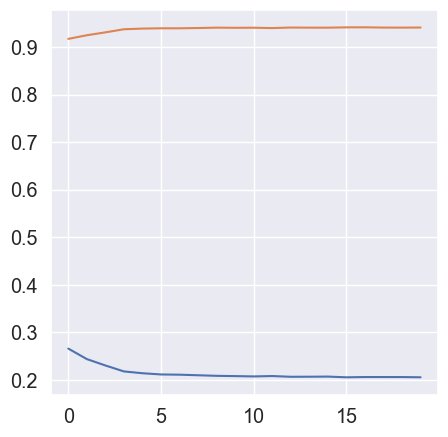

In [404]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.show()

In [403]:
model.predict(x_test)

343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.0931915 ],
       [0.05707025],
       [0.08342904],
       ...,
       [0.3835693 ],
       [0.13172588],
       [0.9999972 ]], dtype=float32)

In [405]:
y_pred = np.where(model.predict(x_test)>0.5,1,0)
y_pred

343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [406]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9417077175697866

In [ ]:
df[:360] 

In [410]:
##The person with the score closest to 1 is most likely to be promoted

model.predict(x_test[:20])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.0931915 ],
       [0.05707025],
       [0.08342904],
       [0.12553564],
       [0.07810444],
       [0.08988568],
       [0.07092874],
       [0.13383195],
       [0.01945354],
       [0.10202853],
       [0.05685434],
       [0.11551312],
       [0.31058365],
       [0.06007216],
       [0.12969597],
       [0.07753355],
       [0.26743746],
       [0.02880986],
       [0.0931007 ],
       [0.12252267]], dtype=float32)

In [407]:
import joblib

In [412]:
joblib.dump(model , 'ANN_model_promotion.pkl')
joblib.dump(x_test.columns , 'ANNpromotion_inputs')


['ANNpromotion_inputs']